In [78]:
import pandas as pd

# Specify the full path to the CSV file in the Downloads folder
file_path = "C:/Users/reube/Downloads/media_views.csv"

# Read the CSV file and assign it to the variable 'data'
df_media = pd.read_csv(file_path)


df_media.shape


(926, 16)

New data frame accessed

In [1]:
import pandas as pd

# Specify the full path to the CSV file in the Downloads folder
file_path = "C:/Users/reube/Downloads/responses.csv"
df_response = pd.read_csv(file_path)

file_path = "C:/Users/reube/Downloads/page_views.csv"
df_page = pd.read_csv(file_path)

file_path = "C:/Users/reube/Downloads/media_views.csv"
df_media = pd.read_csv(file_path)

file_path = "C:/Users/reube/Downloads/items.csv"
df_items = pd.read_csv(file_path)

file_path = "C:/Users/reube/Downloads/checkpoints_pulse.csv"
df_pulse = pd.read_csv(file_path)

file_path = "C:/Users/reube/Downloads/checkpoints_eoc.csv"
df_eoc = pd.read_csv("C:/Users/reube/Downloads/checkpoints_eoc.csv")


C:\Users\reube\AppData\Local\Temp\ipykernel_14304\3274701530.py:5: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_response = pd.read_csv(file_path)
C:\Users\reube\AppData\Local\Temp\ipykernel_14304\3274701530.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_page = pd.read_csv(file_path)


In [33]:
df_eoc
# Calculate n_attempts
n_attempts = [40, 127, 145, 217, 90]

# Calculate max_score for the current chapter
max_score = [38, 87, 104, 118, 63]

n_correct = [35, 73, 80, 87, 49]

for i in range(len(n_attempts)):
    accuracy = n_correct[i] / max_score[i]
    if n_correct[i] > 0:
        efficiency = n_attempts[i] / n_correct[i]
    else:
        efficiency = 0
    
    # Calculate F1 score
    if accuracy + efficiency != 0:
        f1_score = (2 * accuracy * efficiency) / (accuracy + efficiency)
    else:
        f1_score = 0

    print("F1 Score:", f1_score)
    


print("Metrics for Student Performance:")
print("Total Number of Attempts (n_attempts):", n_attempts)
print("Number of Correct Responses (n_correct):", n_correct)
print("Maximum Possible Score (max_score):", max_score)



F1 Score: 1.0200364298724955
F1 Score: 1.1321284650140433
F1 Score: 1.0800744878957171
F1 Score: 1.1381461944235116
F1 Score: 1.0928013876843017
Metrics for Student Performance:
Total Number of Attempts (n_attempts): [40, 127, 145, 217, 90]
Number of Correct Responses (n_correct): [35, 73, 80, 87, 49]
Maximum Possible Score (max_score): [38, 87, 104, 118, 63]


In [44]:
# Correct implementation of F1 score
f1_scores = []
for i in range(len(n_attempts)):
    precision = n_correct[i] / n_attempts[i]
    if n_correct[i] > 0:
        recall = n_correct[i] / n_possible[i]
    else:
        recall = 0
    
    # Calculate F1 score
    if precision + recall != 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0
    
    f1_scores.append(f1_score)

print("F1 Scores:", f1_scores)


F1 Scores: [0.8974358974358975, 0.6822429906542056, 0.642570281124498, 0.5194029850746269, 0.6405228758169934]


: 

In [2]:
df_pulse.head()


,book,release,institution_id,class_id,student_id,chapter_number,construct,response
0,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,10,Cost,NaN
1,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,11,Cost,NaN
2,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,12,Cost,NaN
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,2,Cost,2.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,3,Cost,2.0


In [29]:
unique_student_count = df_pulse['construct'].nunique()
print("Number of unique student IDs:", unique_student_count)


Number of unique student IDs: 4


(11712, 8)

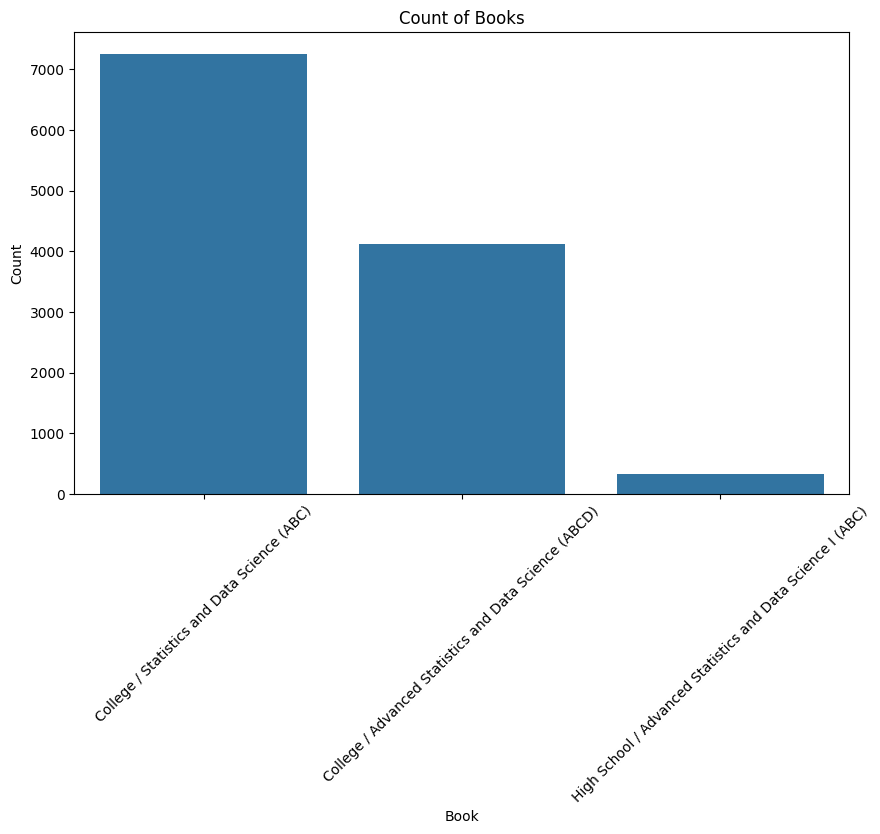

In [25]:
import matplotlib.pyplot as plt  # Correct import statement
import seaborn as sns# Example visualizations
# Count plot for books
plt.figure(figsize=(10, 6))
sns.countplot(x='book', data=df_pulse)
plt.title('Count of Books')
plt.xlabel('Book')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

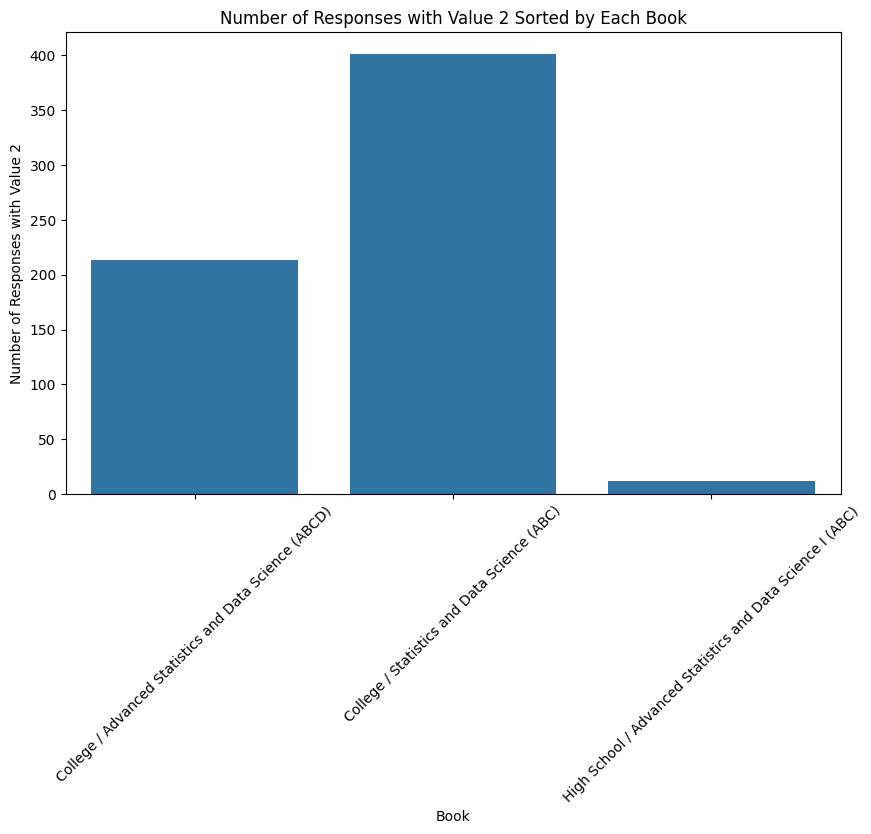

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the response value you want to count
response_value = 2  # Change this to the desired response value

# Filter the DataFrame based on the response value
filtered_df = df_pulse[df_pulse['response'] == response_value]

# Group by 'book' and count occurrences of the response value
response_counts = filtered_df.groupby('book').size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='book', y='count', data=response_counts)
plt.title(f'Number of Responses with Value {response_value} Sorted by Each Book')
plt.xlabel('Book')
plt.ylabel(f'Number of Responses with Value {response_value}')
plt.xticks(rotation=45)
plt.show()


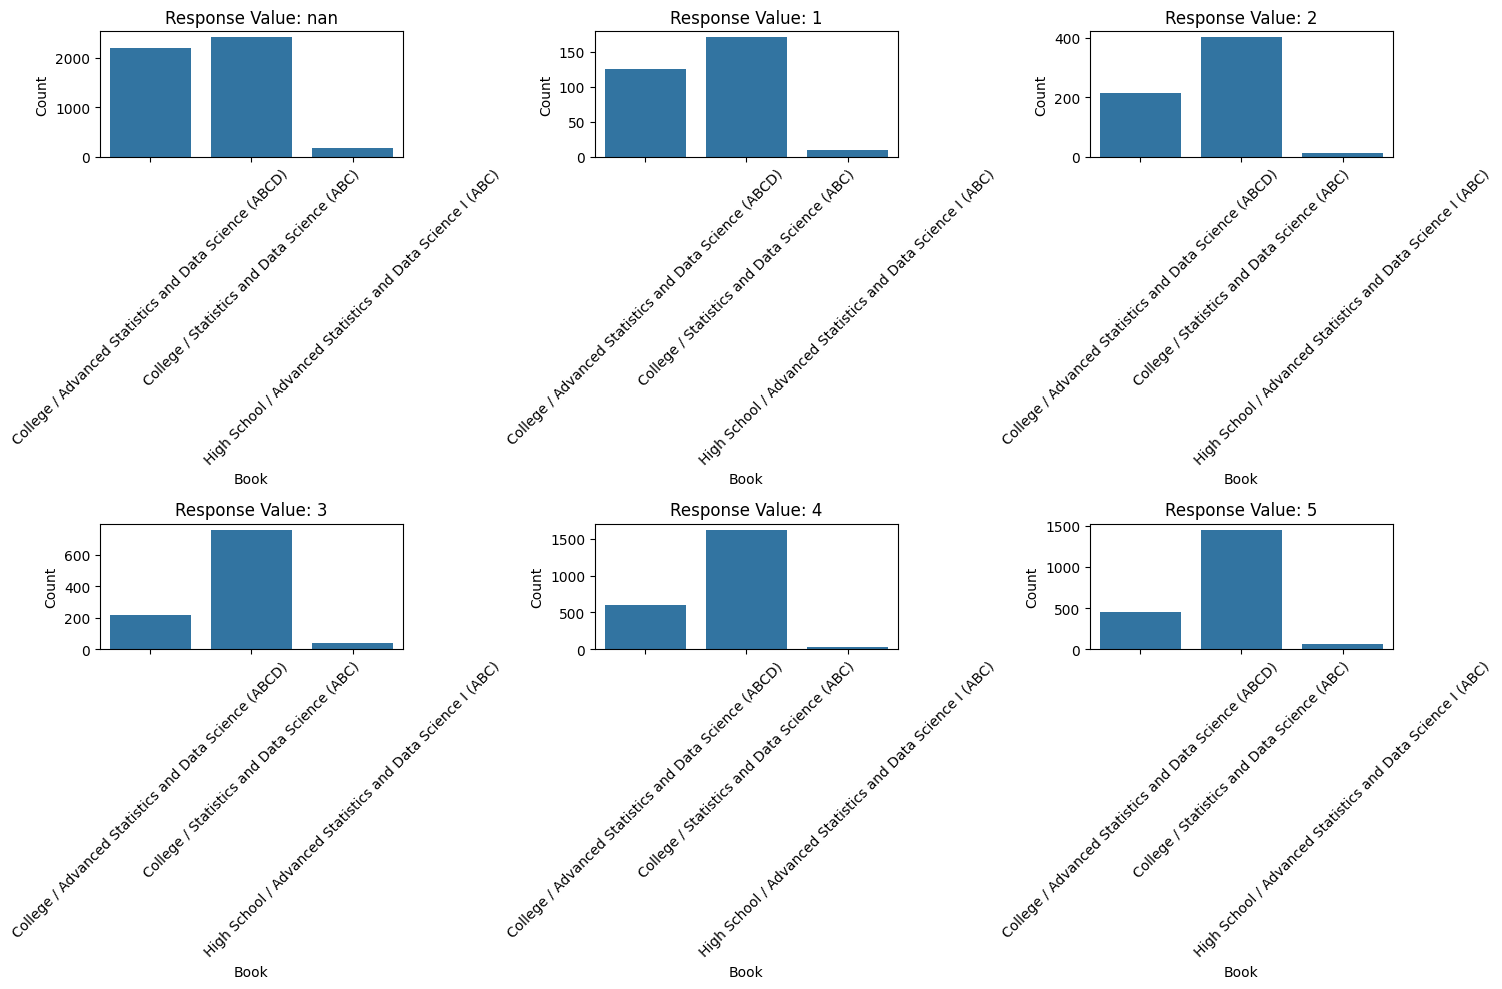

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the responses to plot, including NaN
responses = [float('nan'), 1, 2, 3, 4, 5]

# Create a subplot with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each response and plot the count for each book
for i, response_value in enumerate(responses):
    # Filter the DataFrame based on the response value, including handling NaN
    if pd.isna(response_value):
        filtered_df = df_pulse[df_pulse['response'].isna()]
    else:
        filtered_df = df_pulse[df_pulse['response'] == response_value]
    
    # Group by 'book' and count occurrences of the response value
    response_counts = filtered_df.groupby('book').size().reset_index(name='count')
    
    # Plot
    sns.barplot(x='book', y='count', data=response_counts, ax=axes[i])
    axes[i].set_title(f'Response Value: {response_value}')
    axes[i].set_xlabel('Book')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


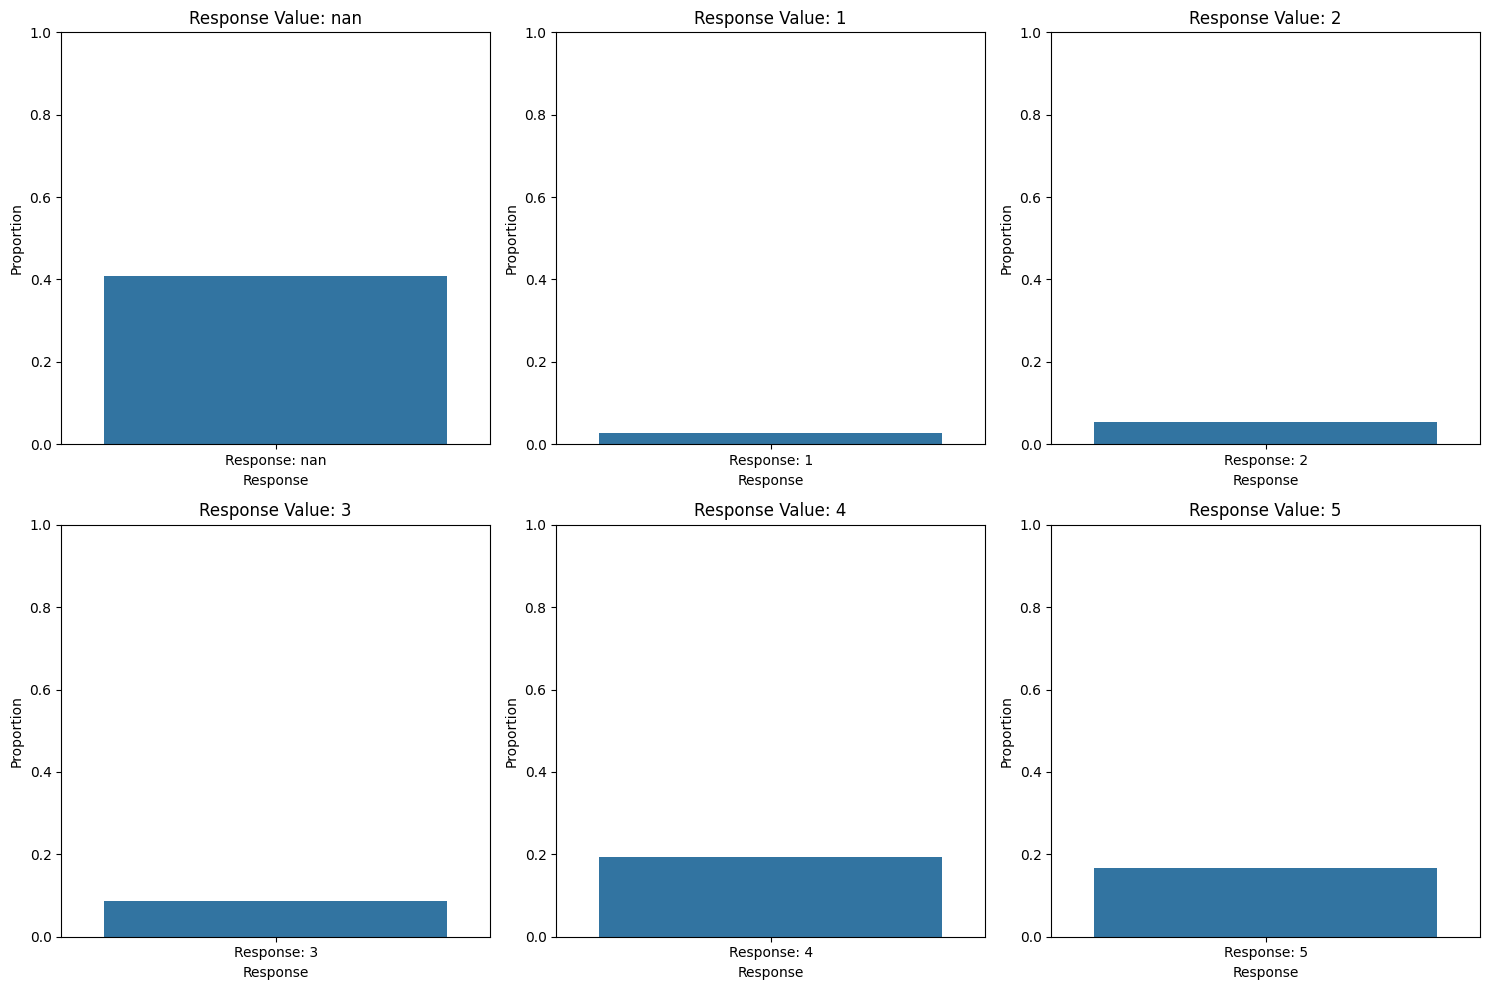

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the responses to plot, including NaN
responses = [float('nan'), 1, 2, 3, 4, 5]

# Create a subplot with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Calculate the total count of responses across all books
total_responses = len(df_pulse)

# Iterate over each response and plot the proportion for all books
for i, response_value in enumerate(responses):
    # Filter the DataFrame based on the response value, including handling NaN
    if pd.isna(response_value):
        filtered_df = df_pulse[df_pulse['response'].isna()]
    else:
        filtered_df = df_pulse[df_pulse['response'] == response_value]
    
    # Calculate the count of response_value for all books
    count_response_value = len(filtered_df)
    
    # Calculate proportion
    proportion = count_response_value / total_responses
    
    # Plot
    sns.barplot(x=[f'Response: {response_value}'], y=[proportion], ax=axes[i])
    axes[i].set_title(f'Response Value: {response_value}')
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel('Proportion')
    axes[i].set_ylim(0, 1)  # Set y-axis limit to ensure proportions are between 0 and 1

# Adjust layout
plt.tight_layout()
plt.show()


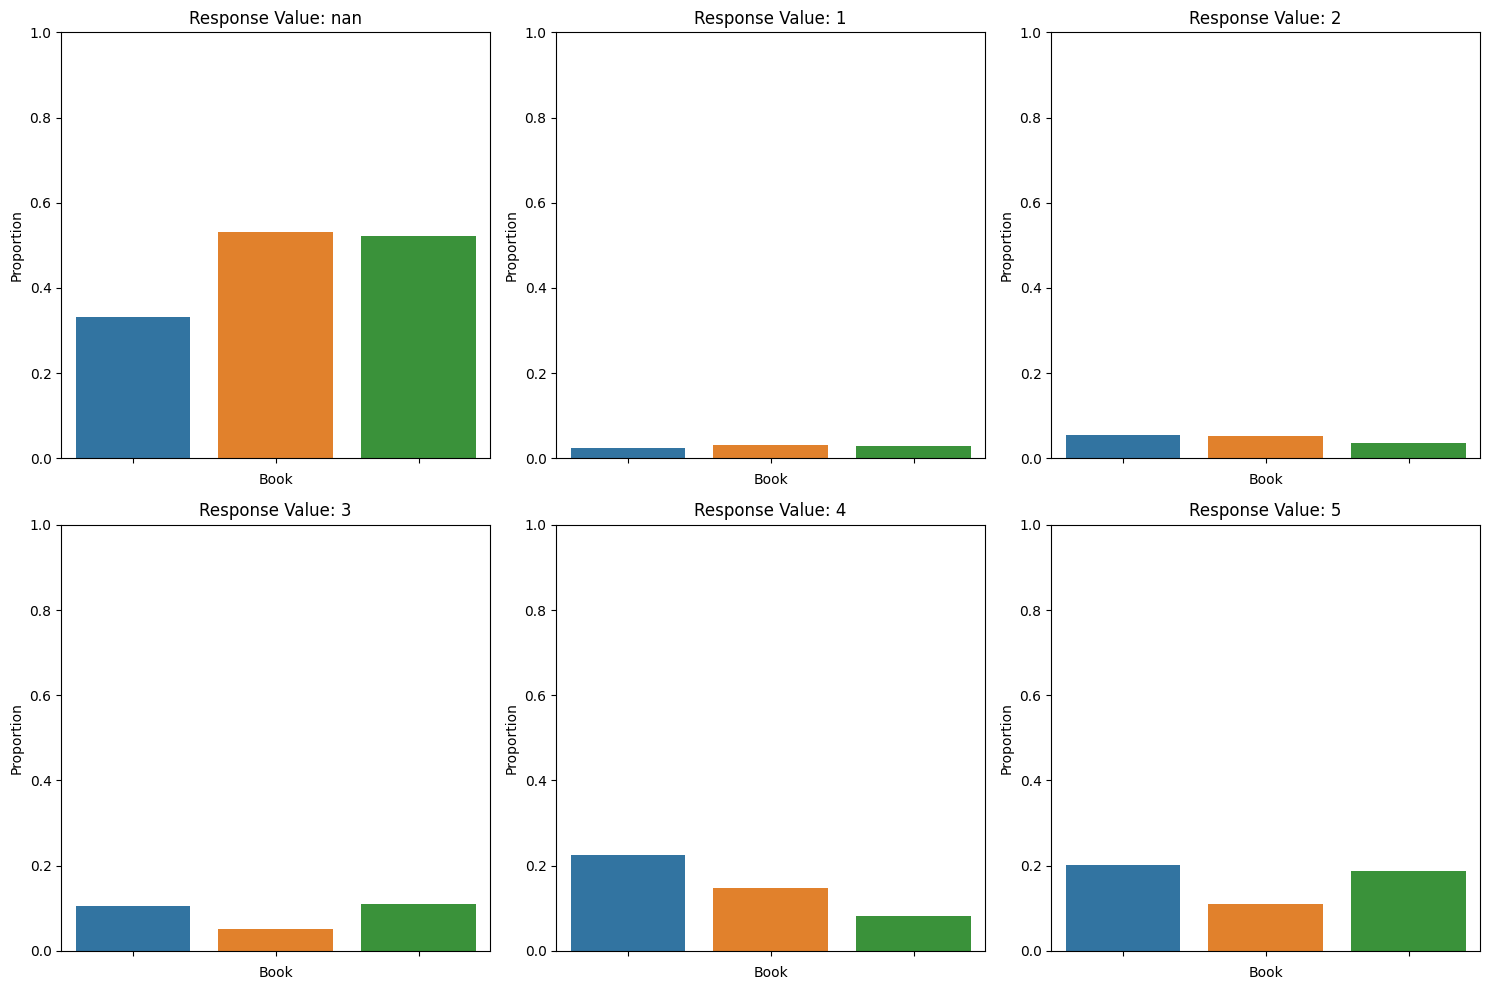

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the responses to plot, including NaN
responses = [float('nan'), 1, 2, 3, 4, 5]

# Get unique book names
unique_books = df_pulse['book'].unique()

# Create a subplot with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each response and plot the proportion for each book
for i, response_value in enumerate(responses):
    # Iterate over each book
    for j, book in enumerate(unique_books):
        # Filter the DataFrame based on the response value, including handling NaN and for the specific book
        if pd.isna(response_value):
            filtered_df = df_pulse[(df_pulse['response'].isna()) & (df_pulse['book'] == book)]
        else:
            filtered_df = df_pulse[(df_pulse['response'] == response_value) & (df_pulse['book'] == book)]
        
        # Calculate the count of response_value for the specific book
        count_response_value_for_book = len(filtered_df)
        
        # Calculate the total responses for the specific book
        total_responses_for_book = len(df_pulse[df_pulse['book'] == book])
        
        # Calculate proportion
        proportion = count_response_value_for_book / total_responses_for_book
        
        # Plot
        sns.barplot(x=[f'Book: {book}'], y=[proportion], ax=axes[i])
        axes[i].set_title(f'Response Value: {response_value}')
        axes[i].set_xlabel('Book')
        axes[i].set_ylabel('Proportion')
        axes[i].set_ylim(0, 1)  # Set y-axis limit to ensure proportions are between 0 and 1
        axes[i].set_xticklabels([]) 
# Adjust layout
plt.tight_layout()
plt.show()


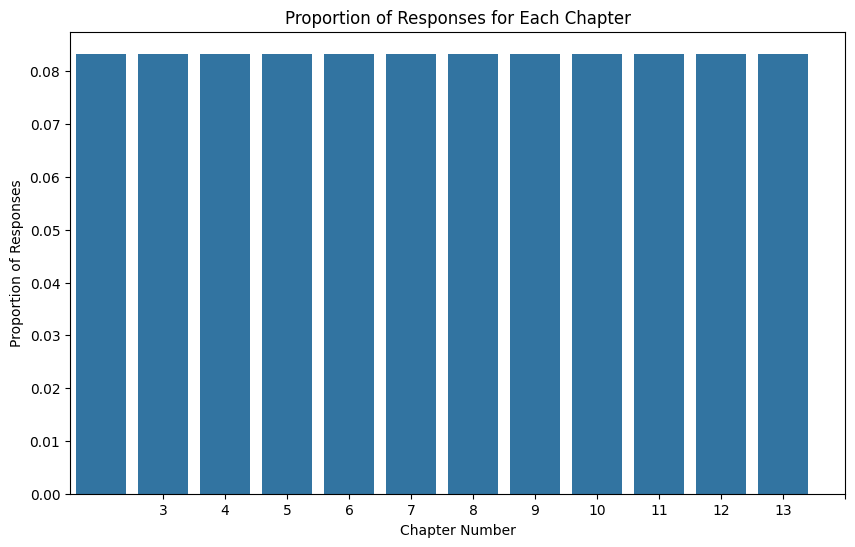

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the total number of chapters
total_chapters = 12

# Calculate the proportion of responses for each chapter
chapter_proportions = df_pulse['chapter_number'].value_counts(normalize=True).sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=chapter_proportions.index, y=chapter_proportions.values)
plt.title('Proportion of Responses for Each Chapter')
plt.xlabel('Chapter Number')
plt.ylabel('Proportion of Responses')
plt.xticks(range(1, total_chapters + 1))  # Set x-axis ticks for each chapter
plt.show()
